## Hiding Function+ Import Statements + PATH definition

In [2]:
#import nltk # please download wordnet and stopwords if not already downloaded 

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

from matplotlib import pyplot as plt 
from pylab import xticks
import numpy as np
import matplotlib.ticker as ticker
from sklearn.metrics import f1_score,precision_score,recall_score,roc_auc_score
import pickle
import time

import nltk # please download wordnet and stopwords if not already downloaded 

import pandas as pd
import numpy as np

from nltk.corpus import wordnet
from nltk.corpus import stopwords

from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.lancaster import LancasterStemmer


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF

from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.decomposition import NMF
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from matplotlib import pyplot as plt 
from pylab import xticks
import numpy as np
import matplotlib.ticker as ticker
from sklearn.metrics import f1_score,precision_score,recall_score

hide_toggle()

# Data Preprocessing for Negative-Positive Set-Segregation

## Regex for Cleaning

In [11]:
# #Using regex to clean the incoming corpus 

df=pd.read_csv('all_claims_with_direction.csv',index_col=0)


# df=pd.read_csv('/Users/ssaeed/Documents/all_claims_edited_0204.csv',encoding='latin1')

import re

def split_it(line):
    
    line2=re.sub('\b\w{1,3}\b|<.*?>|((\d+)[\.])|\((.+?)\)|[0-9]+',"",str(line))
    
    return line2

df['claim_text']=df['claim_text'].apply(split_it)

df.drop_duplicates(subset=None, keep='first', inplace=False)



df.describe

df.to_csv('all_claims_with_direction.csv',index=False)

hide_toggle()

## Read in Dataset

## Stemming and Lemmatization 

In [12]:
#Stemming and Lemmatization

stemmer = SnowballStemmer("english", ignore_stopwords=True)
lemmer=LancasterStemmer()
lemma=WordNetLemmatizer()


class LemmaCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: ([lemma.lemmatize(w) for w in analyzer(doc)]) 

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

SCV = StemmedCountVectorizer(ngram_range=(1,2),stop_words='english',max_df=0.2,min_df=2)

LCV=LemmaCountVectorizer(stop_words='english',ngram_range=(1,2),max_features=4000,max_df=0.2,min_df=3)

hide_toggle()

In [14]:
a=pd.read_csv('all_claims_with_direction.csv')

#print(len(a))

a=a.dropna()

#print(len(a))

#nltk.download('stopwords')
#nltk.download('wordnet')

claims=a['claim_text']
label=a['Ineligibility']
label2=a['Ineligibility']

#print(sum(label))
#print(len(label))

hide_toggle()

### SMOTE ADASYN (adaptive synthetic minority oversampling)

In [15]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
#claim_tr, claim_tst, label_tr, label_tst = train_test_split(claims, labels, test_size = 0.2, random_state = 0)

train,test = train_test_split(a,test_size = 0.2, random_state = 0)


# Show the results of the split
print ("Training set has {} samples.".format(train.shape[0]))
print ("Testing set has {} samples.".format(test.shape[0]))

hide_toggle()

Training set has 45914 samples.
Testing set has 11479 samples.


In [16]:
#Sklearn new way upsampling

# from sklearn.utils import resample

# eleg=a[train.Ineligibility==0]
# ineleg=a[train.Ineligibility==1]

# ineleg=resample(ineleg,replace=True,n_samples=len(eleg),random_state=12)
# full=pd.concat([eleg,ineleg])

# claims=full['claim_text']
# labels=full['Ineligibility']

In [17]:
#SKLEARN upsampling

from sklearn.utils import resample

eleg=train[train.Ineligibility==0]
ineleg=train[train.Ineligibility==1]

ineleg=resample(ineleg,replace=True,n_samples=len(eleg),random_state=12)

full=pd.concat([eleg,ineleg])

claim_tr=full['claim_text']
label_tr=full['Ineligibility']

In [18]:
train.shape

(45914, 2)

In [19]:
# %%time
# #using adasyn
# from imblearn.over_sampling import SMOTE,ADASYN


# claims=train['claim_text']
# labels=train['Ineligibility']

# claim2=transformer.fit_transform(claims)


# sm = ADASYN(random_state=42)
# claims, labels = sm.fit_resample(claim2, labels)

# print(sum(labels))

In [20]:
eleg=test[test.Ineligibility==0]
ineleg=test[test.Ineligibility==1]

eleg=resample(eleg,replace=False,n_samples=len(ineleg),random_state=12)

full=pd.concat([eleg,ineleg])

claim_tst=full['claim_text']
label_tst=full['Ineligibility']

## Split Training/Test

## Running the Algorithm + Performance



8000  (1,2)

('lr',LogisticRegression(C=0.03,penalty='l2',class_weight={0:1,1:1.5}))])

F1: 0.81
Precision: 0.804
Recall: 0.815
ROC SCORE= 0.897

 Percentiles: 

25th: 0.14
Median: 0.24
75th: 0.42
95th: 0.71
                 predicted
label predicted           
0     0                127
      1                 19
1     0                 44
      1                102
0.8661971830985915
                           abs_deviation
allan_score abs_deviation               
1           0                         50
            1                          1
            2                         29
2           1                         29
3           0                         72
            1                          5
            2                         52
                               abs_deviation
eligibility_101 abs_deviation               
1               0                        401
                1                          4
                2                         36
3              

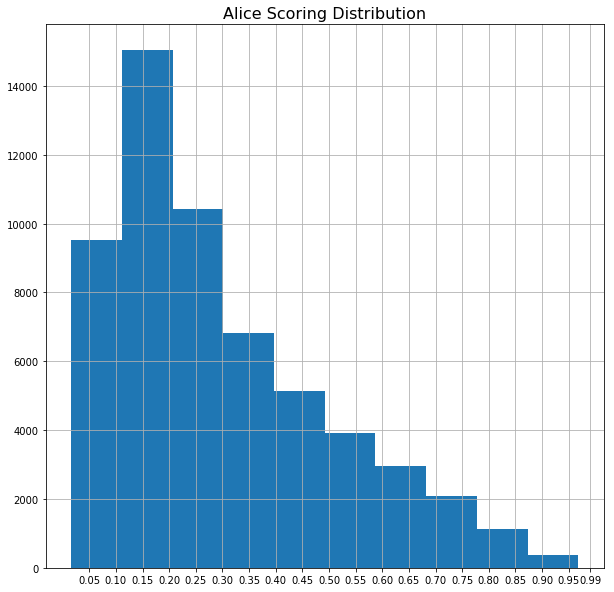

In [21]:
%%time

ae= '''

8000  (1,2)

('lr',LogisticRegression(C=0.03,penalty='l2',class_weight={0:1,1:1.5}))])
'''

print(ae)

LCV=LemmaCountVectorizer(stop_words='english',ngram_range=(1,2),max_df=0.2,min_df=3,max_features=8000)


text_ensemble_lemmatized = Pipeline([('vectorizer', LCV), 
                                     ('tfidf', TfidfTransformer(norm='l2',use_idf=True,smooth_idf=True)),
                                     ('lr',LogisticRegression(C=0.03,penalty='l2',class_weight={0:1,1:1.5}))])

#text_ensemble_lemmatized = LogisticRegression(C=0.01,penalty='l2',class_weight={0:1,1:1})


# # create the ensemble model
from time import time

start=time()

text_ensemble_lemmatized.fit(claim_tr,label_tr)
predicted=text_ensemble_lemmatized.predict(claim_tst)
#predicted2=text_ensemble_lemmatized.predict(claim)
predicted3=text_ensemble_lemmatized.predict_proba(claims)[:,1]
predicted4=text_ensemble_lemmatized.predict_proba(claim_tst)[:,1]
predicted6=text_ensemble_lemmatized.predict_proba(claim_tst)
#predicted7=text_ensemble_lemmatized.predict_proba(claim)

from sklearn.metrics import f1_score,precision_score,recall_score

print("F1:",round(f1_score(label_tst,predicted,average='binary'),3))
print("Precision:",round(precision_score(label_tst,predicted,average='binary'),3))
print("Recall:",round(recall_score(label_tst,predicted,average='binary'),3))
print("ROC SCORE=",round(roc_auc_score(label_tst,predicted4),3))


# print(time()-start)
# print(sum(predicted3<0.1))

hide_toggle()

predicted3=pd.Series(predicted3)

fig,ax=plt.subplots()
predicted3.hist(ax=ax,bins=10,figsize=(10,10))

plt.xticks([0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,.45,0.5,0.55,0.6,0.65,.7,0.75,0.8,0.85,0.9,0.95,0.99])
plt.title('Alice Scoring Distribution', fontsize=16)

predicted3=pd.Series(predicted3)

art=predicted3.groupby(pd.cut(predicted3, np.linspace(0,1,21))).count()#/predicted3.count()

print("\n Percentiles: \n" )

print("25th: {}".format(round(predicted3.quantile(0.25),2)))
print("Median: {}".format(round(predicted3.quantile(0.50),2)))
print("75th: {}".format(round(predicted3.quantile(0.75),2)))
print("95th: {}".format(round(predicted3.quantile(0.95),2)))

#
#
#

qar=text_ensemble_lemmatized.predict_proba(claim_tst)

qart=pd.DataFrame()

qart['claim']=claim_tst
qart['label']=label_tst
qart['score']=qar[:,1]

def g(row):
    
    if row['score']<0.6:
        
        val=0
    
    else:
        val=1
    
    
    return val

qart['predicted']=qart.apply(g,axis=1)

qart['deviation']=abs(qart['predicted']-qart['label'])

print(qart.groupby(['label','predicted'])[['predicted']].count())

#qart.to_csv('testing_of_test_set.csv')

#
#
#


a=pd.read_csv('/Users/ssaeed/Documents/alice_scoring/alice_test.csv')

a['claim_text']=a['claim_text'].apply(split_it)

claim=a['claim_text']

#claim= transformer.transform(claim)

#claim_transform=transformer.transform(claim)

predicted5=text_ensemble_lemmatized.predict_proba(claim)[:,1]
predicted4=text_ensemble_lemmatized.predict(claim)

e=[]

for i in range(len(predicted5)):
    
    e.append(round(predicted5[i],3))


a['alice_score_v4'] = e
a['alice_prediction']=predicted4

print(predicted4.sum()/float(a.shape[0]))

# cols=[7,8]
# a=a.drop(a.columns[cols],axis=1)

#a.to_csv('/Users/ssaeed/Documents/alice_scoring/alice_test_nonsmote.csv')

#
#
#

from sklearn.feature_extraction.text import TfidfVectorizer

a=pd.read_csv('/Users/ssaeed/Documents/alice_scoring/allan_usaa.csv')

a['claim_text']=a['claim_text'].apply(split_it)

claim=a['claim_text']

#claim= transformer.transform(claim)

#claim_transform=transformer.transform(claim)

predicted5=text_ensemble_lemmatized.predict_proba(claim)[:,1]


e=[]

for i in range(len(predicted5)):
    
    e.append(round(predicted5[i],3))



a['alice_score_v4'] = e

# cols=[7,8]
# a=a.drop(a.columns[cols],axis=1)

def f(row):
    
    if row['alice_score_v4']<0.60:
        val=3
    
    elif row['alice_score_v4']>0.60 and row['alice_score_v4']<0.61 :
        val=2

    else:
        val=1
    
    
    return val 

a['v4_rating']=a.apply(f,axis=1)

def g(row):
    
    return abs(row['allan_score']-row['v4_rating'])

a['abs_deviation']=a.apply(g,axis=1)

# cols=[7,8]
# a=a.drop(a.columns[cols],axis=1)

print(a.groupby(['allan_score','abs_deviation'])[['abs_deviation']].count())

#
#
#
#

a=pd.read_csv('/Users/ssaeed/Documents/alice_scoring/star_ratings.csv')

a['claim_text']=a['claim_text'].apply(split_it)

claim=a['claim_text']

#claim= transformer.transform(claim)

#claim_transform=transformer.transform(claim)

predicted5=text_ensemble_lemmatized.predict_proba(claim)[:,1]


e=[]

for i in range(len(predicted5)):
    
    e.append(round(predicted5[i],3))


a['alice_score_v4'] = e

# cols=[7,8]
# a=a.drop(a.columns[cols],axis=1)

def f(row):
    
    if row['alice_score_v4']<0.6:
        val=3
    
    elif row['alice_score_v4']>0.6 and row['alice_score_v4']<0.61 :
        val=2

    else:
        val=1
    
    
    return val 

a['v3_rating']=a.apply(f,axis=1)

def g(row):
    
    return abs(row['eligibility_101']-row['v3_rating'])

a['abs_deviation']=a.apply(g,axis=1)


print(a.groupby(['eligibility_101','abs_deviation'])[['abs_deviation']].count())

hide_toggle()

In [24]:
import joblib

with open('alice_model_v4.joblib', 'wb') as f:
    joblib.dump(text_ensemble_lemmatized, f)